In [23]:
# Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


In [25]:
# Source data : Twitter

In [26]:
data_t = pd.read_csv("final_relevance_check.csv")
data_t.tail(5)

,Unnamed: 0,Unnamed: 0.1,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month,check,sentiment,sentiment_class,check_mental_health,check_covid,relevance
63359,63359,63359,1/28/2021 7:44,[],russelwongphoto,0,0,0,frontline,stpi honours frontline healthcare social worke...,2021,1,pd,0.7184,Very Positive,True,True,True
63360,63360,63360,1/26/2021 15:02,[],ShaheerBirdieFC,7,1,0,frontline,covid care speech drove us frontline warriors ...,2021,1,pd,0.9735,Very Positive,False,True,False
63361,63361,63361,1/23/2021 12:41,[],rishabhm,0,0,0,frontline,know still early days india seems administerin...,2021,1,pd,0.0000,Neutral,True,True,True
63362,63362,63362,1/16/2021 15:50,[],Erongodath,0,0,0,frontline,pm gets emotional speaking invaluable contribu...,2021,1,pd,0.1531,Positve,True,True,True
63363,63363,63363,5/19/2021 19:33,[],MissFortuneCat,0,0,0,school closure,like super necessary people share things like ...,2021,5,pd,0.9186,Very Positive,True,True,True


In [27]:
# Dropping columns

In [28]:
data_t = data_t.drop(["Unnamed: 0","Unnamed: 0.1","hashtags","nretweets","search","check","nlikes"], axis = 1)

In [29]:
data_t.head(5)

,date,username,nreplies,clean_tweet4,year,month,sentiment,sentiment_class,check_mental_health,check_covid,relevance
0,12/29/2019 13:54,JesusDailyTwits,0,best depression killer worshipping jesus try v...,2019,12,-0.2960,Negative,True,False,False
1,12/29/2019 12:47,Aluvrendar,3,hope blessings majlis depression never return ...,2019,12,0.6149,Very Positive,True,False,False
2,12/29/2019 12:33,mengwong,2,feels like theory psychohistory ing together h...,2019,12,-0.4939,Negative,True,False,False
3,12/28/2019 18:33,haziqqqaaahzik,1,post project depression cant believe days ende...,2019,12,0.5267,Positve,True,False,False
4,12/26/2019 2:16,NASYRANN_,1,depression thought,2019,12,-0.5719,Very Negative,True,False,False


In [30]:
# Renaming the columns

In [31]:
data_t = data_t.rename({"check_mental_health":"contain_mental_health", "check_covid":"contain_covid","check_sg":"contain_sg","sentiment":"sentiment_score","clean_tweet4":"text"}, axis=1)

In [32]:
data_t.tail()

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance
63359,1/28/2021 7:44,russelwongphoto,0,stpi honours frontline healthcare social worke...,2021,1,0.7184,Very Positive,True,True,True
63360,1/26/2021 15:02,ShaheerBirdieFC,1,covid care speech drove us frontline warriors ...,2021,1,0.9735,Very Positive,False,True,False
63361,1/23/2021 12:41,rishabhm,0,know still early days india seems administerin...,2021,1,0.0000,Neutral,True,True,True
63362,1/16/2021 15:50,Erongodath,0,pm gets emotional speaking invaluable contribu...,2021,1,0.1531,Positve,True,True,True
63363,5/19/2021 19:33,MissFortuneCat,0,like super necessary people share things like ...,2021,5,0.9186,Very Positive,True,True,True


In [33]:
data_t.shape

(63364, 11)

In [34]:
data_t.isnull().sum()

date                     0
username                 0
nreplies                 0
text                     1
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
dtype: int64

In [35]:
percent_missing = data_t.isnull().sum() * 100 / len(data_t)
missing_value_df = pd.DataFrame({'column_name': data_t.columns,
                                 'percent_missing': percent_missing})

In [36]:
missing_value_df

,column_name,percent_missing
date,date,0.000000
username,username,0.000000
nreplies,nreplies,0.000000
text,text,0.001578
year,year,0.000000
month,month,0.000000
sentiment_score,sentiment_score,0.000000
sentiment_class,sentiment_class,0.000000
contain_mental_health,contain_mental_health,0.000000
contain_covid,contain_covid,0.000000


In [37]:
data_t.dropna(inplace=True)

In [38]:
data_t.isnull().sum()

date                     0
username                 0
nreplies                 0
text                     0
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
dtype: int64

In [40]:
data_t = data_t.reset_index()

In [41]:
# Feature Extraction

In [42]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count = CountVectorizer(binary = True)
bow = count.fit_transform(data_t['sentiment_class'].values)

data_1 = pd.DataFrame(bow.toarray(), columns = count.get_feature_names())
data_1

,negative,neutral,positive,positve,very
0,1,0,0,0,0
1,0,0,1,0,1
2,1,0,0,0,0
3,0,0,0,1,0
4,1,0,0,0,1
...,...,...,...,...,...
63358,0,0,1,0,1
63359,0,0,1,0,1
63360,0,1,0,0,0
63361,0,0,0,1,0


In [43]:
data_1 = data_1.reset_index()
data_1

,index,negative,neutral,positive,positve,very
0,0,1,0,0,0,0
1,1,0,0,1,0,1
2,2,1,0,0,0,0
3,3,0,0,0,1,0
4,4,1,0,0,0,1
...,...,...,...,...,...,...
63358,63358,0,0,1,0,1
63359,63359,0,0,1,0,1
63360,63360,0,1,0,0,0
63361,63361,0,0,0,1,0


In [44]:
data = pd.concat([data_t,data_1], axis=1)
data.head()

,level_0,index,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,positve,very
0,0,0,12/29/2019 13:54,JesusDailyTwits,0,best depression killer worshipping jesus try v...,2019,12,-0.2960,Negative,True,False,False,0,1,0,0,0,0
1,1,1,12/29/2019 12:47,Aluvrendar,3,hope blessings majlis depression never return ...,2019,12,0.6149,Very Positive,True,False,False,1,0,0,1,0,1
2,2,2,12/29/2019 12:33,mengwong,2,feels like theory psychohistory ing together h...,2019,12,-0.4939,Negative,True,False,False,2,1,0,0,0,0
3,3,3,12/28/2019 18:33,haziqqqaaahzik,1,post project depression cant believe days ende...,2019,12,0.5267,Positve,True,False,False,3,0,0,0,1,0
4,4,4,12/26/2019 2:16,NASYRANN_,1,depression thought,2019,12,-0.5719,Very Negative,True,False,False,4,1,0,0,0,1


In [45]:
data = data.drop(["level_0","text","nreplies"], axis = 1)

In [46]:
# Multilabel Encoding

In [47]:
categorical_columns = list(data.loc[:, data.dtypes =="object"].columns)
categorical_columns

['date', 'username', 'sentiment_class']

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, data)

In [49]:
data.head()

,index,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,positve,very
0,0,11991,2729,2019,12,-0.2960,0,True,False,False,0,1,0,0,0,0
1,1,11985,428,2019,12,0.6149,4,True,False,False,1,0,0,1,0,1
2,2,11982,11689,2019,12,-0.4939,0,True,False,False,2,1,0,0,0,0
3,3,11897,9499,2019,12,0.5267,2,True,False,False,3,0,0,0,1,0
4,4,11730,3861,2019,12,-0.5719,3,True,False,False,4,1,0,0,0,1


In [50]:
# Target Variable

In [51]:
data["has_mental_impact"] = np.where((data['negative']== 1) & (data['relevance']==1) ,1,0)

In [52]:
data.head()

,index,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,positve,very,has_mental_impact
0,0,11991,2729,2019,12,-0.2960,0,True,False,False,0,1,0,0,0,0,0
1,1,11985,428,2019,12,0.6149,4,True,False,False,1,0,0,1,0,1,0
2,2,11982,11689,2019,12,-0.4939,0,True,False,False,2,1,0,0,0,0,0
3,3,11897,9499,2019,12,0.5267,2,True,False,False,3,0,0,0,1,0,0
4,4,11730,3861,2019,12,-0.5719,3,True,False,False,4,1,0,0,0,1,0


In [53]:
data["has_mental_impact"].value_counts()

0    59645
1     3718
Name: has_mental_impact, dtype: int64

In [54]:
data.isnull().sum()

index                    0
date                     0
username                 0
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
index                    0
negative                 0
neutral                  0
positive                 0
positve                  0
very                     0
has_mental_impact        0
dtype: int64

In [55]:
data["username"].count()

63363

In [56]:
data = data.drop("index", axis =1)

In [57]:
# Train_Test Split

In [58]:
y = data["has_mental_impact"]
X = data.drop("has_mental_impact", axis = 1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state  = 42)

In [60]:
X_train.head(5)

,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,negative,neutral,positive,positve,very
62511,14398,8150,2021,2,0.4767,2,True,True,True,0,0,0,1,0
19127,31597,6100,2020,5,0.7096,4,True,False,False,0,0,1,0,1
54964,47628,737,2021,7,0.0000,1,True,False,False,0,1,0,0,0
16063,35030,4014,2020,6,0.4019,2,True,False,False,0,0,0,1,0
45571,25128,5856,2020,4,0.4404,2,False,True,False,0,0,0,1,0


In [61]:
y_train.head()

62511    0
19127    0
54964    0
16063    0
45571    0
Name: has_mental_impact, dtype: int32

In [62]:
X_test.head()

,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,negative,neutral,positive,positve,very
55650,47822,6529,2021,7,0.0258,1,False,True,False,0,1,0,0,0
29702,42432,2173,2021,7,0.4019,2,True,False,False,0,0,0,1,0
48916,39105,2335,2020,6,0.0000,1,True,True,True,0,1,0,0,0
8420,51310,15422,2019,8,-0.4404,0,True,False,False,1,0,0,0,0
38242,27553,14740,2019,4,0.3818,2,True,True,True,0,0,0,1,0


In [63]:
y_test.head()

55650    0
29702    0
48916    0
8420     0
38242    0
Name: has_mental_impact, dtype: int32

In [64]:
# Standardization of the data

In [65]:
scale = StandardScaler()
features = X_train.columns
X_train = scale.fit_transform(X_train[features])

X_test = scale.transform(X_test)

In [66]:
#Logistic Regression Classifier

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [68]:
#Checking Accuracy Score

In [69]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14916     0]
 [    0   925]]


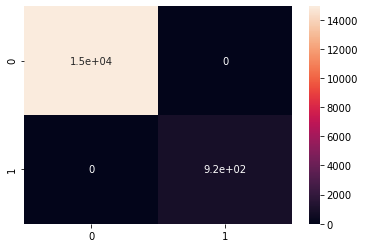

In [71]:
sns.heatmap(confusion_matrix,annot=True)

In [72]:
#Checking Classification Report

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14916
           1       1.00      1.00      1.00       925

    accuracy                           1.00     15841
   macro avg       1.00      1.00      1.00     15841
weighted avg       1.00      1.00      1.00     15841



In [74]:
# ROC auc_score & curve

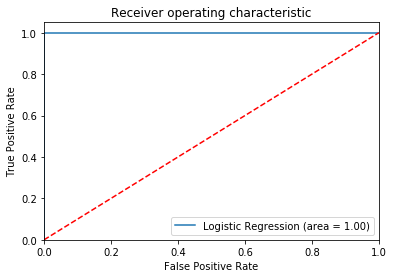

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()